<a href="https://colab.research.google.com/github/Tissyjohnson/DSA_Class_Activities/blob/main/CaseStudy_Breastcancer_TissyJohnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bc = load_breast_cancer()
x = pd.DataFrame(bc.data, columns=bc.feature_names)
y = bc.target



In [2]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
x.shape

(569, 30)

In [4]:
y.shape

(569,)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
acc_before = {}
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc_before[name] = accuracy_score(y_test, y_pred)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("Explained variance ratio:", explained_var)
print("Total variance retained:", sum(explained_var))

Explained variance ratio: [0.43502782 0.19500007 0.09781519 0.06486409 0.05253378 0.041128
 0.0223559  0.01647952 0.01380052 0.01205262 0.01056565 0.00883488
 0.00772384 0.00531689]
Total variance retained: 0.9834987729174017


In [12]:
acc_after = {}
for name, model in models.items():
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca)
    acc_after[name] = accuracy_score(y_test, y_pred)

In [13]:
results = pd.DataFrame({
    'Accuracy Before PCA': acc_before,
    'Accuracy After PCA': acc_after
})
results = results.T.round(4)
print("\nModel Comparison:")
print(results)


Model Comparison:
                     Logistic Regression  Random Forest     KNN     SVM  \
Accuracy Before PCA               0.9737         0.9649  0.9474  0.9825   
Accuracy After PCA                0.9912         0.9649  0.9561  0.9825   

                     Decision Tree  Gradient Boosting  
Accuracy Before PCA         0.9474             0.9561  
Accuracy After PCA          0.9561             0.9737  


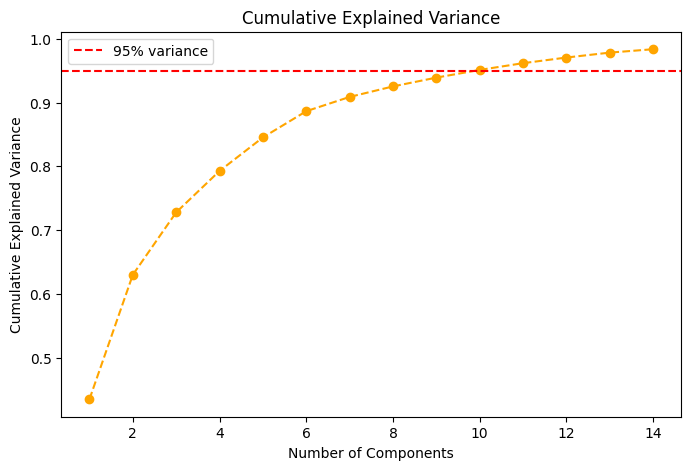

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()
plt.show()